<a href="https://colab.research.google.com/github/JoshFowlkes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/New_LS_DS6_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

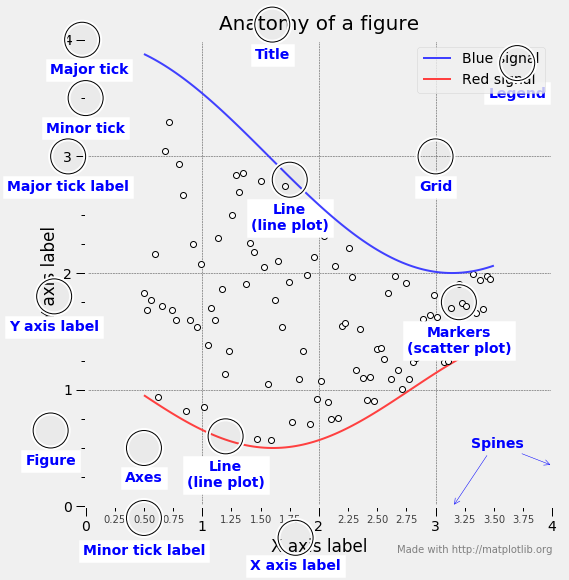

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2 
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [80]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

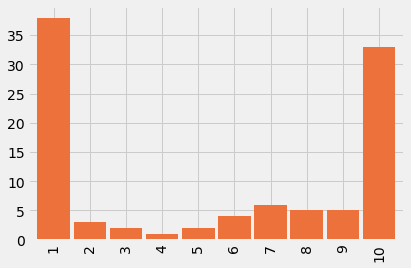

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='#ED713a', width=0.9);

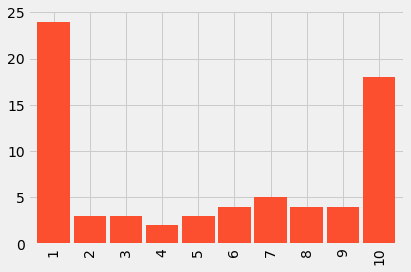

In [82]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

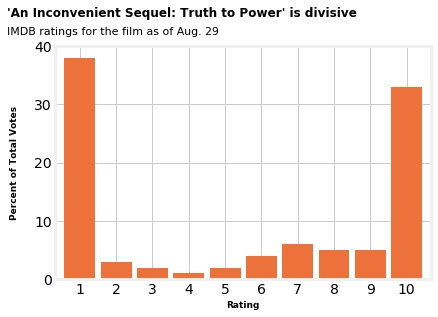

In [83]:
plt.style.use('fivethirtyeight') # the style 
fig = plt.figure()

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

# color of bars on barplot + width
ax = fake.plot.bar(color='#ed713a', width=.85)

# color of background and outside
ax.set(yticks=range(0,50,10), facecolor='white') # go from 0 to 50 in increments of 10
fig.patch.set_facecolor('white') # this does outside 

# Axis Labels
plt.ylabel('Percent of Total Votes', fontsize=9, fontweight='bold', labelpad=15)
plt.xlabel('Rating', fontsize=9, fontweight='bold')

plt.xticks(rotation=720)# rotate x label

# Title
ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=12, fontweight='bold')
ax.text(x=-2, y=42, s="IMDB ratings for the film as of Aug. 29", fontsize=11)



plt.show()

In [84]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [86]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [87]:
df.tail()


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [88]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!



**Replicating Assignment:**





In [0]:
# loading the data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [108]:
# Checking out the shape of the data, and the data itself 
print(df.shape)
df.head(10)

(80053, 26)


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,1,1,3,6,2,6,49,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,0,1,0,0,2,0,12,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,1,6,4,4,4,12,63,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,1,5,3,4,3,12,42,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6


In [91]:
# Transposing to see it more clearly
df.sample(1).T

,29977
timestamp,2017-08-11 15:50:04.489361
respondents,591
category,Aged 30-44
link,http://www.imdb.com/title/tt6322922/ratings-age_3
average,5.3
mean,5.5
median,6
1_votes,243
2_votes,20
3_votes,8


In [92]:
#we're looking for the very last one because it has the running tally of the data set
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [93]:
# checking out the dtype of time stamp
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [94]:
# since time stamp is an object, changing it to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe


<bound method NDFrame.describe of 0       2017-07-17 12:28:32.785639
1       2017-07-17 12:28:33.025600
2       2017-07-17 12:28:33.273919
3       2017-07-17 12:28:33.495325
4       2017-07-17 12:28:33.722849
5       2017-07-17 12:28:33.970009
6       2017-07-17 12:28:34.199847
7       2017-07-17 12:28:34.381001
8       2017-07-17 12:28:34.590224
9       2017-07-17 12:28:34.807101
10      2017-07-17 12:28:35.055251
11      2017-07-17 12:28:35.326192
12      2017-07-17 12:28:35.610367
13      2017-07-17 12:28:35.837364
14      2017-07-17 12:28:36.023600
15      2017-07-17 12:28:36.286318
16      2017-07-17 12:28:36.493883
17      2017-07-17 12:28:36.697246
18      2017-07-17 12:34:17.770310
19      2017-07-17 12:34:17.963319
20      2017-07-17 12:34:18.189098
21      2017-07-17 12:34:18.378583
22      2017-07-17 12:34:18.596179
23      2017-07-17 12:34:18.818522
24      2017-07-17 12:34:19.004680
25      2017-07-17 12:34:19.225794
26      2017-07-17 12:34:19.408369
27      2017-07-17 12

In [95]:
#confirming that what we did with datetime,  worked.
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [96]:
# here we're making the time stamp the index
# then displaying a specific date(the last date)
df.set_index('timestamp', inplace=True)
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [109]:
# making a last date variable
# and also filtering out all the categories except IMDB users
# this omitted the age groups like 18-25 and all that jazz 
last_lastday = df['2017-08-29']
last_lastday_filtered = last_lastday[last_lastday['category'] == 'IMDb users']
last_lastday_filtered.tail(10)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 21:40:06.384083,2660,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,152,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.5,33.7
2017-08-29 21:50:06.071510,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:00:06.565253,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:10:07.085246,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:20:06.947696,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [98]:
# checking to see that the filtering out of the categories, for the last day, worked
last_lastday['category'].value_counts()

Males                 140
Top 1000 voters       140
Aged 18-29            140
Females under 18      140
Females Aged 18-29    140
Males under 18        140
Females               140
Aged 30-44            140
Females Aged 30-44    140
Males Aged 30-44      140
Aged under 18         140
Males Aged 18-29      140
Non-US users          140
Aged 45+              140
IMDb users            140
Females Aged 45+      140
US users              140
IMDb staff            140
Males Aged 45+        140
Name: category, dtype: int64

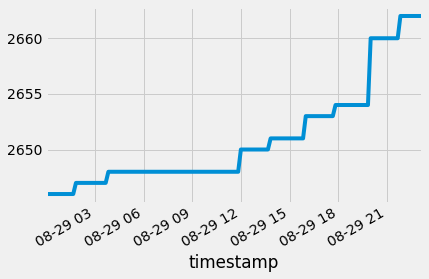

In [105]:
# a little plot of it, should be in stair step manner in this case
last_lastday_filtered.respondents.plot();

In [106]:
# we're assigning our Final variabl to the last one, the tail end. 
# also transposing 
Final = last_lastday_filtered.tail(1)
Final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [107]:
# making columns 
# also displaying only those columns in transpose form
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
Final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [110]:
# making the data that we're gonna plot, and giving it its range
plot_data = Final[pct_columns].T
plot_data.index = range(1,11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


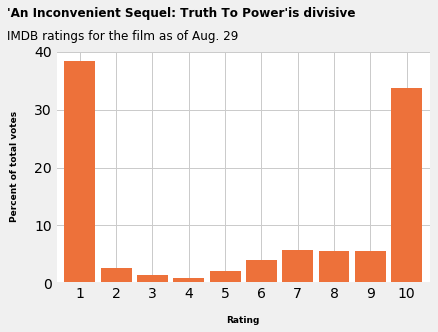

In [123]:
# using the fivethirtyeight style
plt.style.use('fivethirtyeight')

# getting the background color right
fig.patch.set_facecolor('white')

# getting the bar color and width right
ax = plot_data.plot.bar(color = '#ED713A', width=.85, legend=False)

#getting the inner color right
ax.set(facecolor='white')

# Title and Subtitle
ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth To Power'is divisive", 
        fontweight='bold', fontsize='12')
ax.text(x=-2, y=42, s='IMDB ratings for the film as of Aug. 29', fontsize=12);

# X and Y Axis ticks 
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10))

# Set Axis Labels
plt.ylabel(ylabel='Percent of total votes', fontsize=9, fontweight='bold', labelpad=15)
plt.xlabel(xlabel='Rating', fontsize=9, fontweight='bold', labelpad=15)

plt.show()
              

# Stretch Goal

Here is a link to my dataset: https://fivethirtyeight.com/features/the-lebron-james-decision-making-machine/

In [124]:
from google.colab import files
uploaded = files.upload()

Saving lebron.xlsx to lebron.xlsx


In [0]:
lebron_df = pd.read_excel('lebron.xlsx', header=None)

In [0]:
lebron_df.columns = lebron_df.iloc[2]

In [155]:
lebron_df.shape

(1036, 23)

In [207]:
lebron_df.dtypes

2
Player                 object
Rec. MP                object
PG                     object
SG                     object
SF                     object
PF                     object
C                      object
Total                  object
Slope                  object
NaN                   float64
Off +/-                object
Def +/-                object
*                      object
Salary                 object
Age                    object
WORP                   object
Shed $$$               object
1.1737010379249948     object
Upside Value           object
NaN                    object
NaN                   float64
Max others             object
38000000.0            float64
dtype: object

In [210]:
lebron_df.head(20)

2,Player,Rec. MP,PG,SG,SF,PF,C,Total,Slope,nan,Off +/-,Def +/-,*,Salary,Age,WORP,Shed $$$,1.1737010379249948,Upside Value,nan,nan,Max others,38000000.0
0,Houston Rockets,-,https://www.basketball-reference.com/contracts...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,The Cavs will be able to offer LeBron James a ...,-
1,-,-,Assigned MP,-,-,-,-,-,-,-,-,-,-,2019,-,-,-,-,-,-,-,Max CLE,4.1e+07
2,Player,Rec. MP,PG,SG,SF,PF,C,Total,Slope,-,Off +/-,Def +/-,*,Salary,Age,WORP,Shed $$$,1.1737,Upside Value,-,-,Max others,3.8e+07
3,Chris Paul,25.8572,30,-,-,-,-,30,0.184445,-,4.96864,0.855999,*,35400000,33,13.2041,-,<-- Re-sign FA,-,-,-,Opt in,3.5608e+07
4,James Harden,30.4333,10,20,5,-,-,35,0.213171,-,6.53586,-0.0399658,*,30431854,29,16.7263,-,-,-,-,-,-,-
5,LeBron James,33.7035,-,-,25,10,-,35,0,-,5.39551,0.795199,-,35607968,34,16.1255,-,<-- Trade w/ CLE,44.2498,-,-,-,-
6,Eric Gordon,24.516,0,0,0,0,0,0,0,-,1.53333,-1.44806,-,-,30,0,13500375,<-- Trade w/ CLE,6.65914,-,-,-,-
7,Ryan Anderson,19.5182,-,-,10,15,-,25,0.314652,-,0.237255,-1.32638,*,20421546,30,1.28091,-,-,-,-,-,-,-
8,P.J. Tucker,20.7967,0,0,0,0,0,0,0,-,-1.11149,0.772932,-,-,33,0,7969537,<-- Trade w/ CLE,3.7962,-,-,-,-
9,Nene Hilario,9.35477,0,0,0,0,0,0,0,-,-1.84356,2.31969,-,-,36,0,3651480,<-- Trade w/ CLE,1.91501,-,-,-,-


In [0]:
lebron_df = lebron_df.fillna('-')

In [0]:
new_df = lebron_df[~lebron_df['Rec. MP'].isin(['-'])]

In [220]:
new_df

2,Player,Rec. MP,PG,SG,SF,PF,C,Total,Slope,nan,Off +/-,Def +/-,*,Salary,Age,WORP,Shed $$$,1.1737010379249948,Upside Value,nan,nan,Max others,38000000.0
2,Player,Rec. MP,PG,SG,SF,PF,C,Total,Slope,-,Off +/-,Def +/-,*,Salary,Age,WORP,Shed $$$,1.1737,Upside Value,-,-,Max others,3.8e+07
3,Chris Paul,25.8572,30,-,-,-,-,30,0.184445,-,4.96864,0.855999,*,35400000,33,13.2041,-,<-- Re-sign FA,-,-,-,Opt in,3.5608e+07
4,James Harden,30.4333,10,20,5,-,-,35,0.213171,-,6.53586,-0.0399658,*,30431854,29,16.7263,-,-,-,-,-,-,-
5,LeBron James,33.7035,-,-,25,10,-,35,0,-,5.39551,0.795199,-,35607968,34,16.1255,-,<-- Trade w/ CLE,44.2498,-,-,-,-
6,Eric Gordon,24.516,0,0,0,0,0,0,0,-,1.53333,-1.44806,-,-,30,0,13500375,<-- Trade w/ CLE,6.65914,-,-,-,-
7,Ryan Anderson,19.5182,-,-,10,15,-,25,0.314652,-,0.237255,-1.32638,*,20421546,30,1.28091,-,-,-,-,-,-,-
8,P.J. Tucker,20.7967,0,0,0,0,0,0,0,-,-1.11149,0.772932,-,-,33,0,7969537,<-- Trade w/ CLE,3.7962,-,-,-,-
9,Nene Hilario,9.35477,0,0,0,0,0,0,0,-,-1.84356,2.31969,-,-,36,0,3651480,<-- Trade w/ CLE,1.91501,-,-,-,-
10,Chinanu Onuaku,18.4658,0,0,0,0,0,0,0,-,-1.48387,-0.109717,-,-,22,0,1544951,<-- Trade w/ CLE,-,-,-,-,-
11,Zhou Qi,11.7906,0,0,0,0,0,0,0,-,-2.47392,0.17869,-,-,23,0,1378242,<-- Trade w/ CLE,-,-,-,-,-


In [0]:
new_df = new_df.drop(columns = ['Slope', 'PG', 'SG', 'SF', 'PF', 'C', 'Total', 'WORP',
                                'Shed $$$', 'Max others'])

In [247]:
new_df.head(5)

2,Player,Rec. MP,nan,Salary,Age,1.1737010379249948,nan,nan,38000000.0
2,Player,Rec. MP,-,Salary,Age,1.1737,-,-,3.8e+07
3,Chris Paul,25.8572,-,35400000,33,<-- Re-sign FA,-,-,3.5608e+07
4,James Harden,30.4333,-,30431854,29,-,-,-,-
5,LeBron James,33.7035,-,35607968,34,<-- Trade w/ CLE,-,-,-
6,Eric Gordon,24.516,-,-,30,<-- Trade w/ CLE,-,-,-


In [0]:
new_df.rename(columns={'2': ' ', '1.1737010379249948': 'Annoying','38000000.0': 'annoying2', 'Off +/-': 'Offense','Def +/-': 'Defense' }, inplace=True)

In [0]:
new_df = new_df.drop(columns = ['Offense', 'Defense', 'Upside Value'])

In [0]:
new_df = new_df.drop(columns = '*')



In [0]:
newer_df = new_df

In [0]:
newer_df.columns = ['Player', 'Rec. MP', 'something', 'Salary', 'Age', 
                    'annoying2', 'nan1', 'nan2', 'annoying3']

In [250]:
newer_df.head(5)

,Player,Rec. MP,something,Salary,Age,annoying2,nan1,nan2,annoying3
2,Player,Rec. MP,-,Salary,Age,1.1737,-,-,3.8e+07
3,Chris Paul,25.8572,-,35400000,33,<-- Re-sign FA,-,-,3.5608e+07
4,James Harden,30.4333,-,30431854,29,-,-,-,-
5,LeBron James,33.7035,-,35607968,34,<-- Trade w/ CLE,-,-,-
6,Eric Gordon,24.516,-,-,30,<-- Trade w/ CLE,-,-,-


In [0]:
newer_df = newer_df.drop(columns = ['something', 'annoying2',
                                    'nan1', 'nan2', 'annoying3'])

In [255]:
newer_df.head(600)

,Player,Rec. MP,Salary,Age
2,Player,Rec. MP,Salary,Age
3,Chris Paul,25.8572,35400000,33
4,James Harden,30.4333,30431854,29
5,LeBron James,33.7035,35607968,34
6,Eric Gordon,24.516,-,30
7,Ryan Anderson,19.5182,20421546,30
8,P.J. Tucker,20.7967,-,33
9,Nene Hilario,9.35477,-,36
10,Chinanu Onuaku,18.4658,-,22
11,Zhou Qi,11.7906,-,23


In [0]:
newest_df = newer_df[~newer_df['Rec. MP'].isin(['Rec. MP'])]

In [268]:
newest_df.head(5)

,Player,Rec. MP,Salary,Age
3,Chris Paul,25.8572,35400000,33
4,James Harden,30.4333,30431854,29
5,LeBron James,33.7035,35607968,34
6,Eric Gordon,24.516,-,30
7,Ryan Anderson,19.5182,20421546,30


In [0]:
newest_df = newer_df[~newer_df['Salary'].isin(['-'])]

In [270]:
newest_df.head()

,Player,Rec. MP,Salary,Age
2,Player,Rec. MP,Salary,Age
3,Chris Paul,25.8572,35400000,33
4,James Harden,30.4333,30431854,29
5,LeBron James,33.7035,35607968,34
7,Ryan Anderson,19.5182,20421546,30


In [0]:
player = newest_df['Player']
salary = newest_df['Salary']
age = newest_df['Age']
rec = newest_df['Rec. MP']

In [276]:
newest_df.plot.scatter(player, salary)

KeyError: ignored

In [274]:
fig = plt.figure()

fig.patch.set_facecolor('purple')

ax = new

<Figure size 432x288 with 0 Axes>

In [0]:
# just make my own DF 